In [1]:
#employee salary prediction prediction
import pandas as pd

In [2]:
# Make sure 'adult 3.csv' is in the same folder as this notebook
# We add na_values='?' to correctly identify missing data
# We add sep=r',\s*' and engine='python' to handle spacing issues in the csv
data = pd.read_csv("adult 3.csv", na_values='?', sep=r',\s*', engine='python')
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
# Step 2: Understand the Dataset

# Shape of the dataset
print("Shape of the dataset:")
print(data.shape)

# Check for missing values (this will now show the correct count)
print("\nMissing values in each column BEFORE cleaning:")
print(data.isnull().sum())

# Summary statistics for numerical columns
print("\nDescriptive statistics:")
print(data.describe())

Shape of the dataset:
(48842, 15)

Missing values in each column BEFORE cleaning:
age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

Descriptive statistics:
                age        fnlwgt  educational-num  capital-gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.

In [4]:
# Drop all rows with any missing values
data.dropna(inplace=True)

# Now, we'll also drop the low-count categories you identified
data = data[data['workclass'] != 'Without-pay']
data = data[data['workclass'] != 'Never-worked']

print("Shape of data AFTER dropping missing values and rare categories:")
print(data.shape)

Shape of data AFTER dropping missing values and rare categories:
(45201, 15)


In [5]:
print(data.education.value_counts())

education
HS-grad         14769
Some-college     9896
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1505
10th             1223
7th-8th           821
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: count, dtype: int64


In [6]:
data=data[data['education']!='Preschool']
data=data[data['education']!='1st-4th']
print(data.education.value_counts())

education
HS-grad         14769
Some-college     9896
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1505
10th             1223
7th-8th           821
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
Name: count, dtype: int64


In [7]:
#data redubdancy remove educstion fron data set
data.drop(columns=['education'],inplace=True)

In [8]:
data  #after removing redundancy education

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


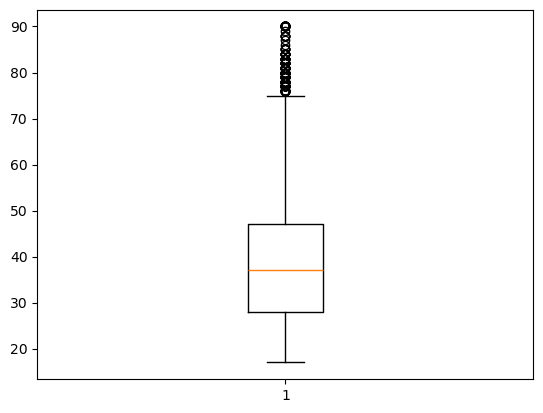

In [9]:
#outliers circles are the outliers need to remove them
import matplotlib.pyplot as plt
plt.boxplot(data['age'])
plt.show()

In [10]:
# cell_execution_count: 10
data=data[(data['age']>=17) & (data['age']<=75)].copy() # <--- ADD .copy() HERE
data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


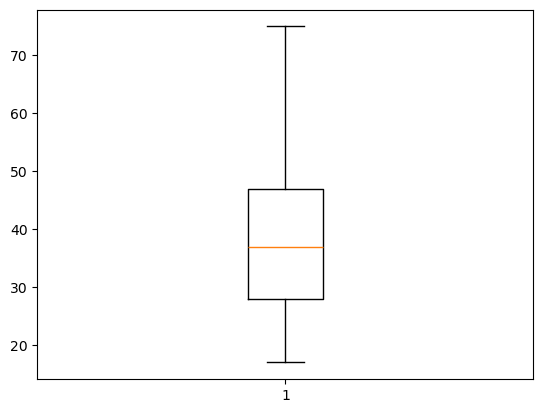

In [11]:
plt.boxplot(data['age'])#removing people age more than 70
plt.show()#after removing them

In [12]:
# --- All New Modeling Pipeline with Model Comparison ---
import numpy as np
import pandas as pd # Make sure pandas is imported
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import joblib

# --- Part 1: Setup and Preprocessing (Same as before) ---

# Make a clean copy to avoid SettingWithCopyWarning
# This assumes your previous cleaning/filtering is done.
data = data.copy()

# 1. Final cleanup: Drop 'fnlwgt' as it's not useful for prediction
data.drop(columns=['fnlwgt'], inplace=True, errors='ignore')

# 2. Encode the target variable 'income' into 0 and 1
# Using .loc to be explicit and avoid warnings
data['income'] = data['income'].map({'<=50K': 0, '>50K': 1})

# 3. Separate features (X) and target (y)
X = data.drop('income', axis=1)
y = data['income']

# 4. Split data BEFORE any preprocessing to prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 5. Create the universal preprocessing pipeline
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=np.number).columns

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("✅ Setup complete. Preprocessor is ready.")
print("-" * 40)




✅ Setup complete. Preprocessor is ready.
----------------------------------------


In [13]:
# --- Part 2: Find the Best Model (Your new code, integrated) ---

# Import the models you want to compare
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Define the different classifiers you want to test
classifiers = {
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    # SVM can be slow, you can comment it out if it takes too long
    # "SVM": SVC(random_state=42),
}

results = {}
print("🤖 Testing different models...")

# Loop through each classifier
for name, classifier in classifiers.items():
    # Create a full pipeline FOR THIS SPECIFIC CLASSIFIER
    # This ensures every model uses the exact same preprocessing
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    
    # Train the pipeline
    model_pipeline.fit(X_train, y_train)
    
    # Make predictions and calculate accuracy
    preds = model_pipeline.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"--- {name}: {acc:.4f}")

# Get the best model based on accuracy
best_model_name = max(results, key=results.get)
print(f"\n✅ Best model is: {best_model_name} with an accuracy of {results[best_model_name]:.4f}")
print("-" * 40)


# --- Part 3: Train and Save the Final, Best Model ---

# Get the best model instance from our dictionary
best_classifier = classifiers[best_model_name]

# 6. Create the final pipeline with the confirmed BEST model
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', best_classifier) # Use the winner from the tournament
])

# 7. Train the entire final pipeline on the training data
print(f"🚀 Training the final model: {best_model_name}")
final_pipeline.fit(X_train, y_train)
print("Training complete.")

# 8. Evaluate the final pipeline with a detailed report
y_pred = final_pipeline.predict(X_test)
print(f"\nFinal Model Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['<=50K', '>50K']))

# 9. Save the entire final pipeline to a single file
joblib.dump(final_pipeline, "best_model.pkl")
print("\n✅ Saved complete pipeline as best_model.pkl")

🤖 Testing different models...
--- LogisticRegression: 0.8431
--- RandomForest: 0.8384
--- KNN: 0.8274
--- GradientBoosting: 0.8569

✅ Best model is: GradientBoosting with an accuracy of 0.8569
----------------------------------------
🚀 Training the final model: GradientBoosting
Training complete.

Final Model Accuracy: 0.8569

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      6699
        >50K       0.77      0.61      0.68      2230

    accuracy                           0.86      8929
   macro avg       0.82      0.77      0.79      8929
weighted avg       0.85      0.86      0.85      8929


✅ Saved complete pipeline as best_model.pkl


In [ ]:
import matplotlib.pyplot as plt

# Bar chart for accuracy results
plt.bar(results.keys(), results.values(), color='skyblue', edgecolor='black')

# Add labels and formatting
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add accuracy values above bars
for model, acc in results.items():
    plt.text(model, acc + 0.005, f'{acc:.2f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()


In [14]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load the trained pipeline
# This single file contains all preprocessing (scaling, encoding) and the model
try:
    pipeline = joblib.load("best_model.pkl")
except FileNotFoundError:
    st.error("Model pipeline 'best_model.pkl' not found. Please run the notebook to train and save the model.")
    st.stop()

# Values for the dropdowns
occupation_options = [
    'Prof-specialty', 'Craft-repair', 'Exec-managerial', 'Adm-clerical', 'Sales', 'Other-service',
    'Machine-op-inspct', 'Transport-moving', 'Handlers-cleaners', 'Farming-fishing', 'Tech-support',
    'Protective-serv', 'Priv-house-serv', 'Armed-Forces', 'Others'
]
workclass_options = ['Private', 'Self-emp-not-inc', 'Local-gov', 'State-gov', 'Self-emp-inc', 'Federal-gov', 'Others']
gender_options = ['Male', 'Female']


st.set_page_config(page_title="Simplified Salary Predictor", page_icon="💡", layout="centered")
st.title("💡 Simplified Salary Predictor")
st.markdown("Provide 5 key details to predict if an employee's income is >50K or ≤50K.")

# --- User Input via Sidebar ---
st.sidebar.header("Enter Your Details")

age = st.sidebar.slider("1. Age", 17, 75, 38)
educational_num = st.sidebar.slider("2. Years of Education", 5, 16, 10)
occupation = st.sidebar.selectbox("3. Occupation", occupation_options)
hours_per_week = st.sidebar.slider("4. Hours worked per Week", 1, 99, 40)
gender = st.sidebar.selectbox("5. Gender", gender_options)


if st.button("Predict Salary", type="primary"):
    # These are the columns the model expects, in order
    # We will use the user's input for 5 columns and provide sensible defaults for the others
    default_values = {
        'workclass': 'Private',
        'marital-status': 'Married-civ-spouse',
        'relationship': 'Husband',
        'race': 'White',
        'capital-gain': 0, # Assuming no capital gain is most common
        'capital-loss': 0, # Assuming no capital loss is most common
        'native-country': 'United-States'
    }

    # Create the full input dictionary
    input_data = {
        'age': age,
        'workclass': default_values['workclass'],
        'educational-num': educational_num,
        'marital-status': default_values['marital-status'],
        'occupation': occupation,
        'relationship': default_values['relationship'],
        'race': default_values['race'],
        'gender': gender,
        'capital-gain': default_values['capital-gain'],
        'capital-loss': default_values['capital-loss'],
        'hours-per-week': hours_per_week,
        'native-country': default_values['native-country']
    }

    input_df = pd.DataFrame([input_data])
    
    st.subheader("Your Input:")
    st.dataframe(input_df[['age', 'educational-num', 'occupation', 'hours-per-week', 'gender']])

    # The pipeline handles all preprocessing automatically
    prediction = pipeline.predict(input_df)[0]
    prediction_proba = pipeline.predict_proba(input_df)

    salary_class = ">50K" if prediction == 1 else "≤50K"
    
    st.markdown("---")
    st.subheader("Prediction Result")
    if salary_class == ">50K":
        st.success(f"**Predicted Salary Class: >50K**")
        st.info(f"Confidence: {prediction_proba[0][1]*100:.2f}%")
    else:
        st.warning(f"**Predicted Salary Class: ≤50K**")
        st.info(f"Confidence: {prediction_proba[0][0]*100:.2f}%")

    with st.expander("See default values used in this prediction"):
        st.json(default_values)

Overwriting app.py


In [15]:
!pip show streamlit

Name: streamlit
Version: 1.32.0
Summary: A faster way to build and share data apps
Home-page: https://streamlit.io
Author: Snowflake Inc
Author-email: hello@streamlit.io
License: Apache License 2.0
Location: C:\Users\ashad\anaconda3\Lib\site-packages
Requires: altair, blinker, cachetools, click, gitpython, numpy, packaging, pandas, pillow, protobuf, pyarrow, pydeck, requests, rich, tenacity, toml, tornado, typing-extensions, watchdog
Required-by: 


In [ ]:
!streamlit run app.py